## Task 1b_partc

Statement of Goal:
    Explore the ACS data, and find

In [51]:
# Imports
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [39]:
df_acs = pd.read_csv('acs_2019_IL.csv')

In [40]:
df_acs.shape

(3123, 43)

In [41]:
#It would make sense to see as many of the 43 columns as possible
pd.set_option("display.max_columns", 50)

In [42]:
df_acs.head()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
0,17,1,100,17001000100,0.813,0.861,0.246,0.068,0.000,10.78,48088.0,4761.0,2202.0,81.3,86.1,6.8,0.0,48088.0,24.6,2202.0,1896.0,1791.0,4761.0,324.0,4761.0,0.0,3381.0,831.0,1896,1791,1896,0,1791,105,306,4741,1044,1044,0,978,66,0,17
1,17,1,201,17001000201,0.879,0.940,0.266,0.078,0.016,10.71,44855.0,1985.0,889.0,87.9,94.0,7.8,1.6,44855.0,26.6,889.0,836.0,781.0,1985.0,155.0,1985.0,32.0,1400.0,373.0,836,781,836,5,781,50,53,1961,383,383,0,383,0,0,17
2,17,1,202,17001000202,0.863,0.933,0.221,0.080,0.008,10.83,50375.0,2376.0,970.0,86.3,93.3,8.0,0.8,50375.0,22.1,970.0,905.0,837.0,2376.0,191.0,2376.0,19.0,1527.0,338.0,905,837,905,7,829,69,65,2336,521,521,0,498,23,0,17
3,17,1,400,17001000400,0.691,0.780,0.094,0.182,0.006,10.31,30164.0,3422.0,1316.0,69.1,78.0,18.2,0.6,30164.0,9.4,1316.0,1027.0,909.0,3422.0,624.0,3422.0,20.0,2536.0,238.0,1027,909,1027,9,909,109,289,3147,645,637,0,619,18,8,17
4,17,1,500,17001000500,0.665,0.787,0.113,0.133,0.035,10.62,41008.0,2175.0,813.0,66.5,78.7,13.3,3.5,41008.0,11.3,813.0,640.0,541.0,2175.0,290.0,2175.0,77.0,1455.0,165.0,640,541,640,0,536,104,173,1878,475,458,0,434,24,17,17


In [43]:
df_acs.describe()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
count,3123.0,3123.00000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3110.000000,3.123000e+03,3123.000000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.0
mean,17.0,77.84342,550658.070445,1.707839e+10,-1.707679e+04,-1.707671e+04,-1.494257e+04,-1.494271e+04,-1.494274e+04,11.021341,-2.706551e+06,4089.219020,1551.756004,-1.707679e+06,-1.707671e+06,-1.494271e+06,-1.494274e+06,-2.706551e+06,-1.494257e+06,1551.756004,1394.305796,1283.443484,4089.219020,626.099584,4089.219020,700.091899,2781.395773,963.824848,1394.305796,1283.443484,1394.305796,5.422991,1272.642331,116.240474,157.450208,3994.042267,924.236631,899.917707,1.065962,842.127121,56.724624,24.318924,17.0
std,0.0,59.65828,371654.169982,5.960782e+07,3.370392e+05,3.370392e+05,3.153218e+05,3.153218e+05,3.153218e+05,0.498528,4.293418e+07,2008.694842,766.964873,3.370392e+07,3.370392e+07,3.153218e+07,3.153218e+07,4.293418e+07,3.153218e+07,766.964873,741.175944,710.599870,2008.694842,980.364285,2008.694842,1054.395723,1375.622715,893.324306,741.175944,710.599870,741.175944,9.220730,707.715562,90.546020,108.225979,1999.898186,572.032757,568.291095,6.939161,553.018746,79.491556,49.936912,0.0
min,17.0,1.00000,100.000000,1.700100e+10,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,8.260000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
25%,17.0,31.00000,71450.000000,1.703171e+10,7.510000e-01,8.480000e-01,1.590000e-01,1.700000e-02,2.600000e-02,10.740000,4.589250e+04,2728.500000,1067.000000,7.510000e+01,8.480000e+01,1.700000e+00,2.600000e+00,4.589250e+04,1.590000e+01,1067.000000,927.000000,832.000000,2728.500000,64.000000,2728.500000,84.500000,1861.000000,342.500000,927.000000,832.000000,927.000000,0.000000,821.500000,56.000000,78.000000,2641.500000,553.000000,537.000000,0.000000,489.000000,0.000000,0.000000,17.0
50%,17.0,43.00000,804102.000000,1.704384e+10,8.230000e-01,8.980000e-01,2.620000e-01,5.200000e-02,7.500000e-02,11.030000,6.132400e+04,3825.000000,1449.000000,8.230000e+01,8.980000e+01,5.200000e+00,7.500000e+00,6.132400e+04,2.620000e+01,1449.000000,1291.000000,1187.000000,3825.000000,204.000000,3825.000000,285.000000,2621.000000,692.000000,1291.000000,1187.000000,1291.000000,0.000000,1174.000000,96.000000,141.000000,3735.000000,833.000000,806.000000,0.000000,743.000000,28.000000,0.000000,17.0
75%,17.0,115.00000,851700.500000,1.711500e+10,8.920000e-01,9.430000e-01,4.530000e-01,1.905000e-01,1.920000e-01,11.350000,8.519600e+04,5111.500000,1915.500000,8.920000e+01,9.430000e+01,1.905000e+01,1.920000e+01,8.519600e+04,4.530000e+01,1915.500000,1734.000000,1619.000000,5111.500000,753.000000,5111.500000,801.000000,3455.000000,1375.000000,1734.000000,1619.000000,1734.000000,9.000000,1606.500000,155.000000,211.000000,4965.000000,1171.500000,1144.500000,0.000000,1085.000000,78.000000,28.000

In [44]:
df_acs.columns

Index(['state', 'county', 'tract', 'geoid', 'f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer', 'state_lkp'],
      dtype='object')

Looking at the shape, columns and the summary statistics, we see a dataset that is entirely quantitative. Of course, the first few columns are IDs, and not continuous variables. They can be recast as strings. 
This would allow us to lead some work on dimensionality reduction.
Each row is a census tract. Most of the quantitative variables start with a prefix. It may be possible later to check for correlations in terms with the same prefix, especially where the prefixes 'nhh' and 'nh'.
For now, we focus on the subset of non-ID variables.

In [45]:
x = df_acs[['f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer']]

In [46]:
# Some basic cleanup
x = x.dropna()
x = StandardScaler().fit_transform(x)

In [47]:
x

array([[ 0.01930425, -0.34054995, -0.37223559, ...,  0.24028611,
         0.11484295, -0.48793537],
       [ 0.63172947,  0.6891298 , -0.2791258 , ..., -0.83840209,
        -0.71561902, -0.48793537],
       [ 0.48326275,  0.59789235, -0.48862283, ..., -0.62991613,
        -0.42621561, -0.48793537],
       ...,
       [-0.16627914, -0.14504114,  0.27022199, ...,  0.86936982,
         0.42941187,  0.8941038 ],
       [ 0.04714176,  0.45451922,  0.00485907, ..., -0.02983917,
        -0.0487329 , -0.48793537],
       [-0.52816677, -0.2493125 , -0.414135  , ...,  0.00460634,
         0.84464286, -0.14743297]])

In [48]:
#We will start with a high number of components, then use an elbow plot to check for the ideal number
pca = PCA(n_components=6)
x = pca.fit_transform(x)

In [36]:
x

array([[ 1.49731678,  1.30185359],
       [-3.13999406, -2.34876469],
       [-2.68212268, -1.89886739],
       ...,
       [ 3.63844842,  1.9036158 ],
       [-0.54754009, -1.85819309],
       [-0.0786214 ,  0.43217908]])

In [49]:
pca.components_

array([[ 0.1441313 ,  0.14004853,  0.10728138, -0.09533997, -0.00713473,
         0.13696758,  0.12252745,  0.22282545,  0.22184645,  0.1441313 ,
         0.14004853, -0.09533997, -0.00713473,  0.12252745,  0.10728138,
         0.22184645,  0.22952696,  0.23267812,  0.22282545, -0.01923903,
         0.22282545,  0.0558221 ,  0.22585014,  0.20218557,  0.22952696,
         0.23267812,  0.22952696,  0.04055995,  0.23298904,  0.05241751,
        -0.00139505,  0.22487025,  0.18594887,  0.1904288 ,  0.00570456,
         0.19625575, -0.00487228, -0.0373698 ],
       [-0.24834245, -0.22297277, -0.24504409,  0.15179675,  0.10180356,
        -0.2490136 , -0.25693584,  0.12011014,  0.10492512, -0.24834245,
        -0.22297277,  0.15179675,  0.10180356, -0.25693584, -0.24504409,
         0.10492512,  0.06975732,  0.04665444,  0.12011014,  0.18058591,
         0.12011014,  0.14187807,  0.10206207, -0.08730947,  0.06975732,
         0.04665444,  0.06975732,  0.02338666,  0.04432415,  0.22116148,
   

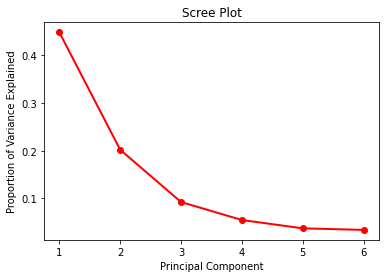

In [52]:
# Plot Values
# Drawn from: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The 'elbow' isn't as clear-cut as in many cases, but

In [50]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.feature_names)

NameError: name 'iris' is not defined